In [1]:
'''
Steps to be followed while doing forecasting using ARIMA
1. Visualize the time series data
2. Make the time series data stationary
3. Plot the correlation and autocorrelation charts
4. Construct the ARIMa models or Seasonal ARIMa model based on data
5. Use the model to make predictions
'''

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

df = pd.read_csv('./data/Copy of market_data_df.csv')

data = df.copy()
data.head()

,Unnamed: 0,DATETIME,HB_HOUSTON (DALMP),GR_ERCOT (WIND_RTI),GR_PANHANDLE (WIND_RTI),GR_COASTAL (WIND_RTI),GR_SOUTH (WIND_RTI),GR_NORTH (WIND_RTI),GR_WEST (WIND_RTI),WZ_ERCOT (RTLOAD),...,WZ_West (RTLOAD),TX - El Paso/Intl (TEMP_F),TX - Houston/Intercontinental (TEMP_F),ERCOT (GEN_RESOURCE),Henry (GASPRICE),HOURENDING,MARKETDAY,PEAKTYPE,MONTH,YEAR
0,0,2020-09-30 01:00:00,11.25,11026.04,1577.95,25.53,840.71,618.14,7963.71,32230.32,...,952.83,60.1,57.9,47779.8,1.691,1,09/30/2020,NaN,SEPTEMBER,2020
1,1,2020-09-30 02:00:00,9.39,11519.25,1970.73,70.00,882.34,799.20,7796.98,30902.57,...,891.15,59.0,57.0,47866.5,1.691,2,09/30/2020,NaN,SEPTEMBER,2020
2,2,2020-09-30 03:00:00,5.90,11220.64,2320.01,100.92,859.02,848.29,7092.40,30103.53,...,885.24,63.0,55.9,47819.4,1.691,3,09/30/2020,NaN,SEPTEMBER,2020
3,3,2020-09-30 04:00:00,5.39,11170.28,2456.07,136.21,945.12,888.14,6744.74,29752.37,...,884.45,57.9,57.0,47739.2,1.691,4,09/30/2020,NaN,SEPTEMBER,2020
4,4,2020-09-30 05:00:00,5.91,11465.83,2545.12,184.12,1040.59,970.29,6725.71,30082.29,...,953.61,55.9,55.9,47602.9,1.691,5,09/30/2020,NaN,SEPTEMBER,2020


In [2]:

data = data.loc[:, ~df.columns.str.contains('^Unnamed')]


In [3]:
data = data.drop("PEAKTYPE", axis=1)

In [4]:
data.head()

,DATETIME,HB_HOUSTON (DALMP),GR_ERCOT (WIND_RTI),GR_PANHANDLE (WIND_RTI),GR_COASTAL (WIND_RTI),GR_SOUTH (WIND_RTI),GR_NORTH (WIND_RTI),GR_WEST (WIND_RTI),WZ_ERCOT (RTLOAD),WZ_Coast (RTLOAD),...,WZ_Southern (RTLOAD),WZ_West (RTLOAD),TX - El Paso/Intl (TEMP_F),TX - Houston/Intercontinental (TEMP_F),ERCOT (GEN_RESOURCE),Henry (GASPRICE),HOURENDING,MARKETDAY,MONTH,YEAR
0,2020-09-30 01:00:00,11.25,11026.04,1577.95,25.53,840.71,618.14,7963.71,32230.32,9466.64,...,2477.51,952.83,60.1,57.9,47779.8,1.691,1,09/30/2020,SEPTEMBER,2020
1,2020-09-30 02:00:00,9.39,11519.25,1970.73,70.00,882.34,799.20,7796.98,30902.57,9135.20,...,2365.45,891.15,59.0,57.0,47866.5,1.691,2,09/30/2020,SEPTEMBER,2020
2,2020-09-30 03:00:00,5.90,11220.64,2320.01,100.92,859.02,848.29,7092.40,30103.53,8914.63,...,2281.30,885.24,63.0,55.9,47819.4,1.691,3,09/30/2020,SEPTEMBER,2020
3,2020-09-30 04:00:00,5.39,11170.28,2456.07,136.21,945.12,888.14,6744.74,29752.37,8861.42,...,2233.98,884.45,57.9,57.0,47739.2,1.691,4,09/30/2020,SEPTEMBER,2020
4,2020-09-30 05:00:00,5.91,11465.83,2545.12,184.12,1040.59,970.29,6725.71,30082.29,8967.94,...,2214.03,953.61,55.9,55.9,47602.9,1.691,5,09/30/2020,SEPTEMBER,2020


In [5]:
data['DATETIME'] = pd.to_datetime(data["DATETIME"])

In [6]:
data.head()

,DATETIME,HB_HOUSTON (DALMP),GR_ERCOT (WIND_RTI),GR_PANHANDLE (WIND_RTI),GR_COASTAL (WIND_RTI),GR_SOUTH (WIND_RTI),GR_NORTH (WIND_RTI),GR_WEST (WIND_RTI),WZ_ERCOT (RTLOAD),WZ_Coast (RTLOAD),...,WZ_Southern (RTLOAD),WZ_West (RTLOAD),TX - El Paso/Intl (TEMP_F),TX - Houston/Intercontinental (TEMP_F),ERCOT (GEN_RESOURCE),Henry (GASPRICE),HOURENDING,MARKETDAY,MONTH,YEAR
0,2020-09-30 01:00:00,11.25,11026.04,1577.95,25.53,840.71,618.14,7963.71,32230.32,9466.64,...,2477.51,952.83,60.1,57.9,47779.8,1.691,1,09/30/2020,SEPTEMBER,2020
1,2020-09-30 02:00:00,9.39,11519.25,1970.73,70.00,882.34,799.20,7796.98,30902.57,9135.20,...,2365.45,891.15,59.0,57.0,47866.5,1.691,2,09/30/2020,SEPTEMBER,2020
2,2020-09-30 03:00:00,5.90,11220.64,2320.01,100.92,859.02,848.29,7092.40,30103.53,8914.63,...,2281.30,885.24,63.0,55.9,47819.4,1.691,3,09/30/2020,SEPTEMBER,2020
3,2020-09-30 04:00:00,5.39,11170.28,2456.07,136.21,945.12,888.14,6744.74,29752.37,8861.42,...,2233.98,884.45,57.9,57.0,47739.2,1.691,4,09/30/2020,SEPTEMBER,2020
4,2020-09-30 05:00:00,5.91,11465.83,2545.12,184.12,1040.59,970.29,6725.71,30082.29,8967.94,...,2214.03,953.61,55.9,55.9,47602.9,1.691,5,09/30/2020,SEPTEMBER,2020


In [7]:
data.set_index("DATETIME", inplace=True)

In [8]:
data.head()

,HB_HOUSTON (DALMP),GR_ERCOT (WIND_RTI),GR_PANHANDLE (WIND_RTI),GR_COASTAL (WIND_RTI),GR_SOUTH (WIND_RTI),GR_NORTH (WIND_RTI),GR_WEST (WIND_RTI),WZ_ERCOT (RTLOAD),WZ_Coast (RTLOAD),WZ_East (RTLOAD),...,WZ_Southern (RTLOAD),WZ_West (RTLOAD),TX - El Paso/Intl (TEMP_F),TX - Houston/Intercontinental (TEMP_F),ERCOT (GEN_RESOURCE),Henry (GASPRICE),HOURENDING,MARKETDAY,MONTH,YEAR
DATETIME,,,,,,,,,,,,,,,,,,,,,
2020-09-30 01:00:00,11.25,11026.04,1577.95,25.53,840.71,618.14,7963.71,32230.32,9466.64,1103.49,...,2477.51,952.83,60.1,57.9,47779.8,1.691,1,09/30/2020,SEPTEMBER,2020
2020-09-30 02:00:00,9.39,11519.25,1970.73,70.00,882.34,799.20,7796.98,30902.57,9135.20,1023.14,...,2365.45,891.15,59.0,57.0,47866.5,1.691,2,09/30/2020,SEPTEMBER,2020
2020-09-30 03:00:00,5.90,11220.64,2320.01,100.92,859.02,848.29,7092.40,30103.53,8914.63,1008.98,...,2281.30,885.24,63.0,55.9,47819.4,1.691,3,09/30/2020,SEPTEMBER,2020
2020-09-30 04:00:00,5.39,11170.28,2456.07,136.21,945.12,888.14,6744.74,29752.37,8861.42,1012.50,...,2233.98,884.45,57.9,57.0,47739.2,1.691,4,09/30/2020,SEPTEMBER,2020
2020-09-30 05:00:00,5.91,11465.83,2545.12,184.12,1040.59,970.29,6725.71,30082.29,8967.94,1029.37,...,2214.03,953.61,55.9,55.9,47602.9,1.691,5,09/30/2020,SEPTEMBER,2020


In [9]:
#define numerical and categorical features
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 22 numerical features : ['HB_HOUSTON (DALMP)', 'GR_ERCOT (WIND_RTI)', 'GR_PANHANDLE (WIND_RTI)', 'GR_COASTAL (WIND_RTI)', 'GR_SOUTH (WIND_RTI)', 'GR_NORTH (WIND_RTI)', 'GR_WEST (WIND_RTI)', 'WZ_ERCOT (RTLOAD)', 'WZ_Coast (RTLOAD)', 'WZ_East (RTLOAD)', 'WZ_FarWest (RTLOAD)', 'WZ_North (RTLOAD)', 'WZ_NorthCentral (RTLOAD)', 'WZ_SouthCentral (RTLOAD)', 'WZ_Southern (RTLOAD)', 'WZ_West (RTLOAD)', 'TX - El Paso/Intl (TEMP_F)', 'TX - Houston/Intercontinental (TEMP_F)', 'ERCOT (GEN_RESOURCE)', 'Henry (GASPRICE)', 'HOURENDING', 'YEAR']

We have 2 categorical features : ['MARKETDAY', 'MONTH']


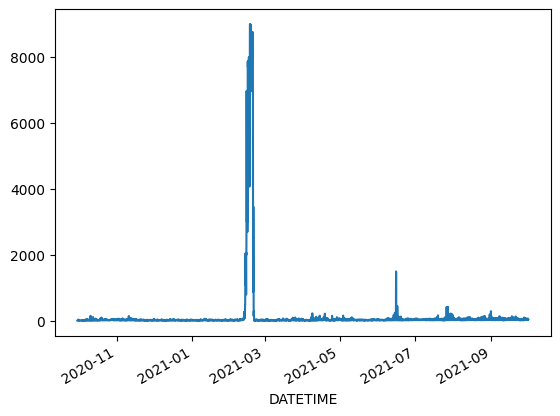

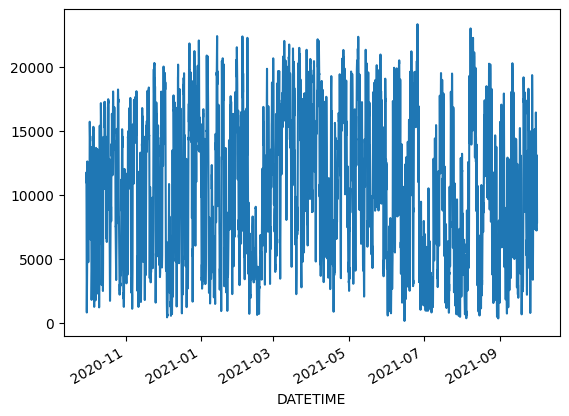

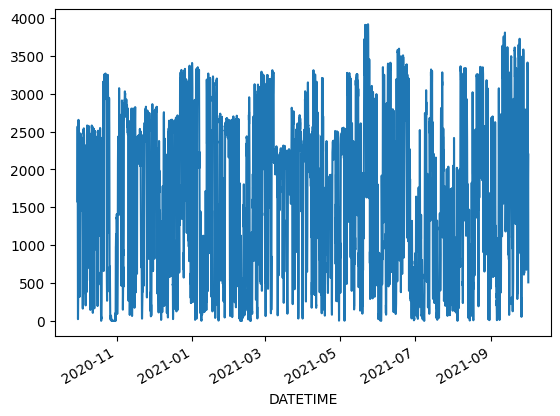

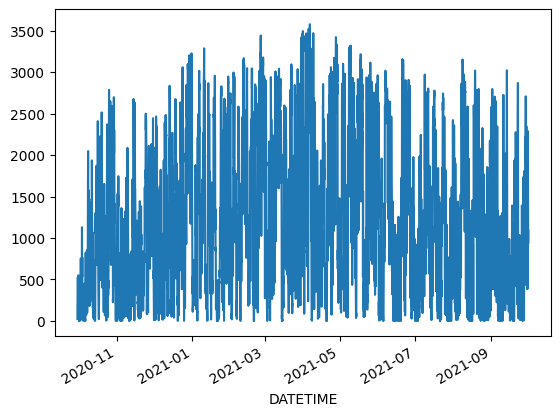

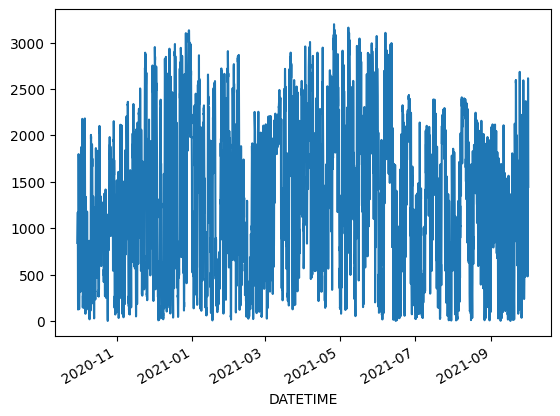

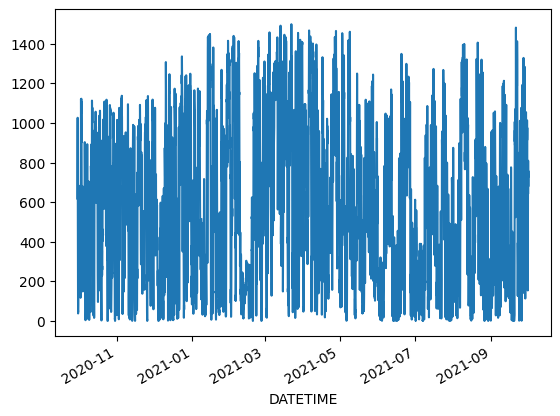

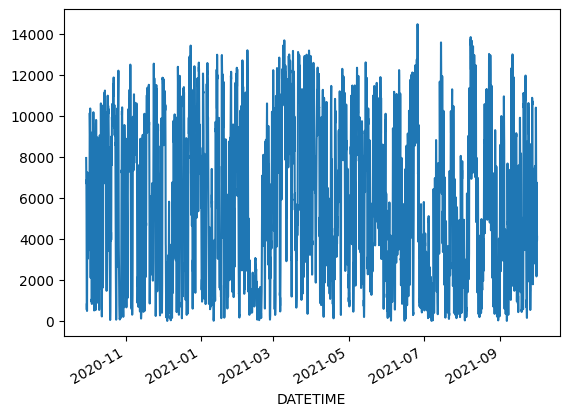

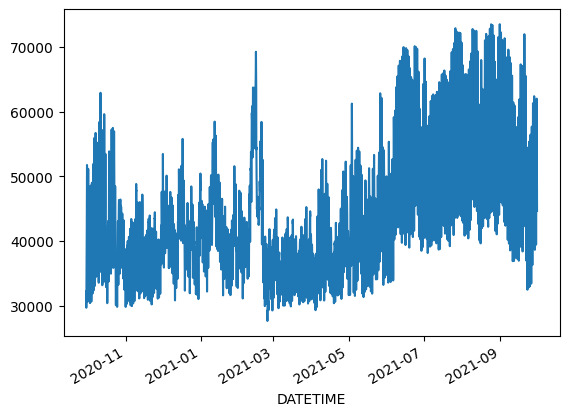

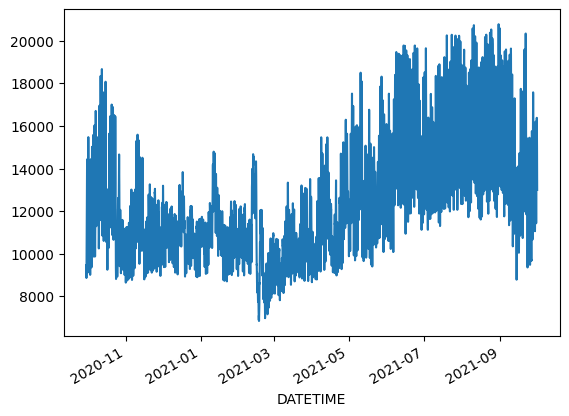

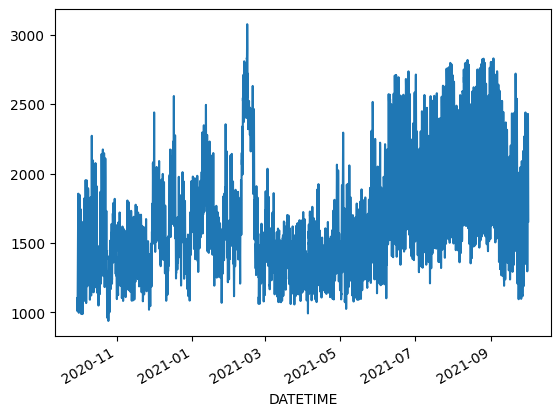

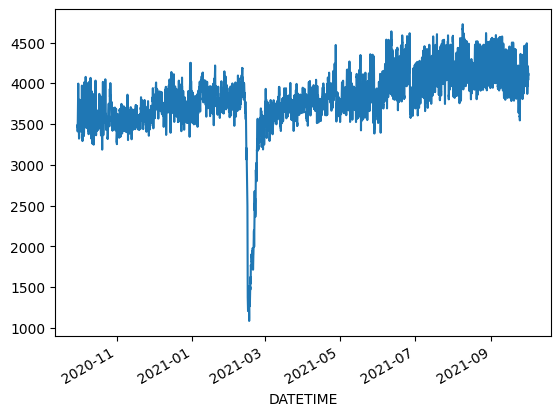

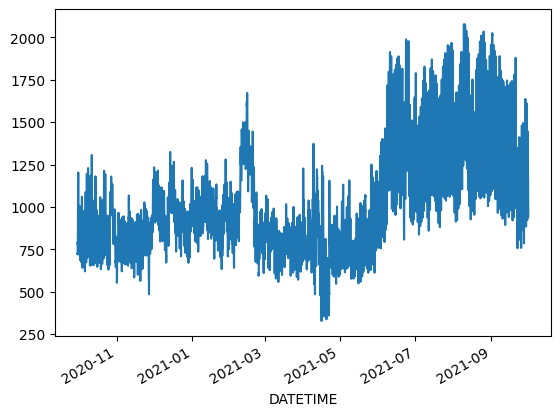

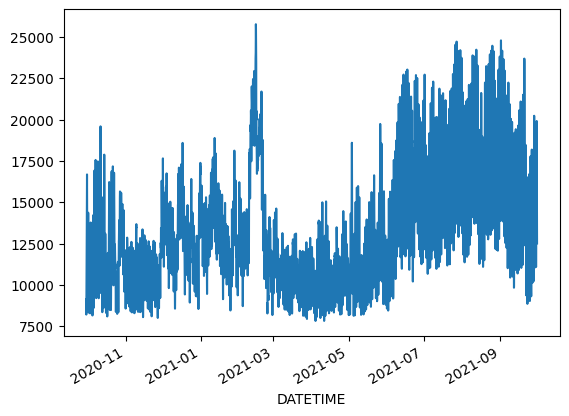

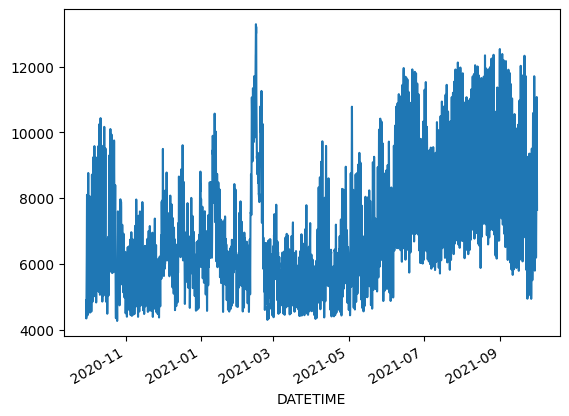

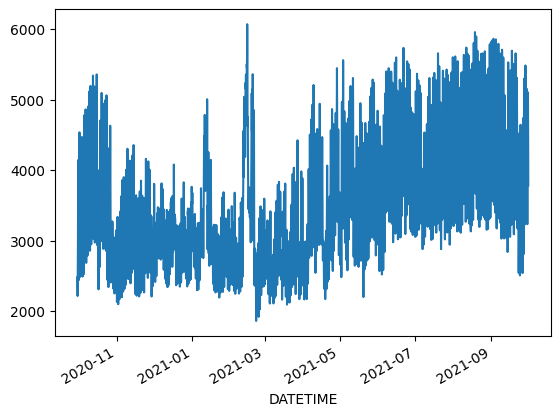

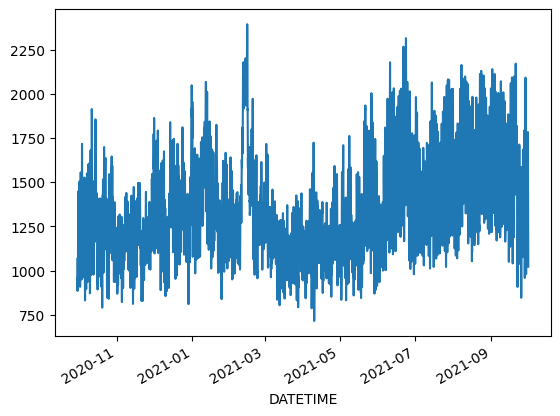

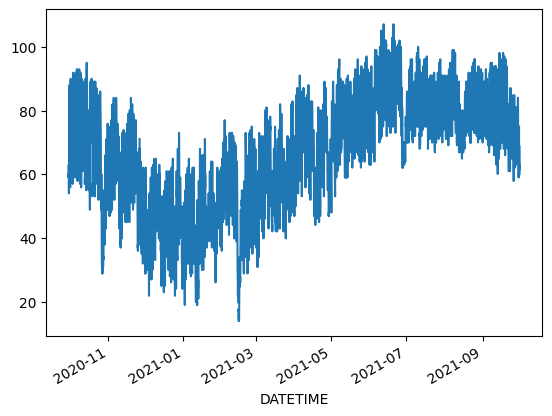

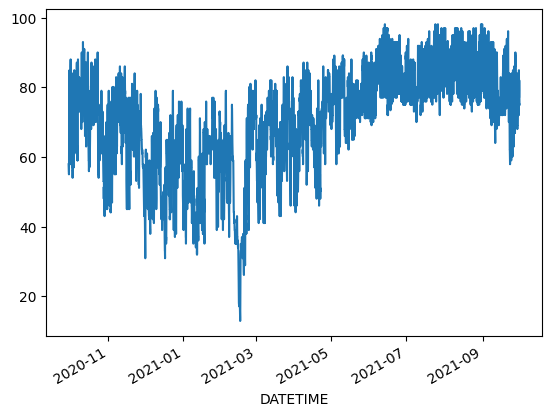

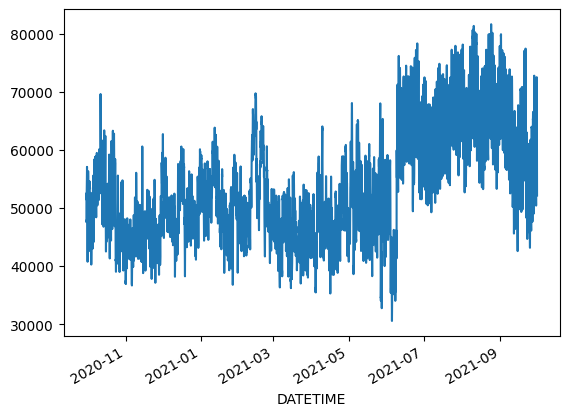

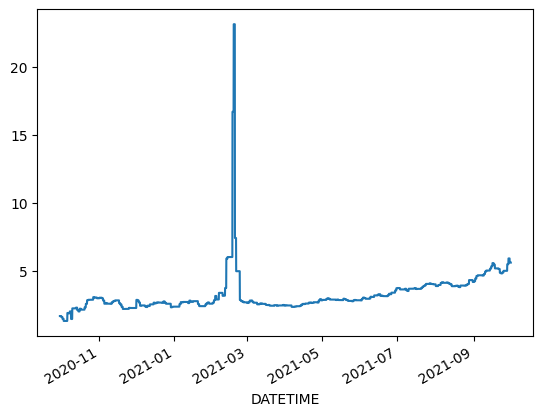

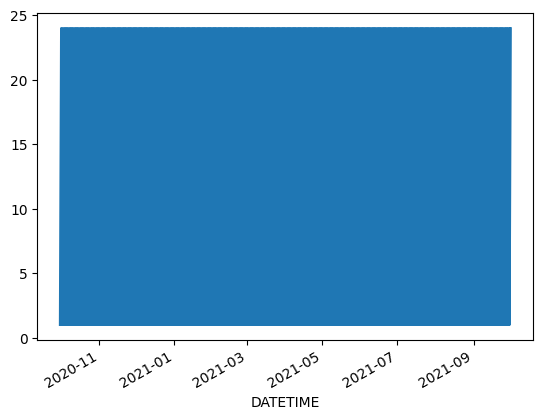

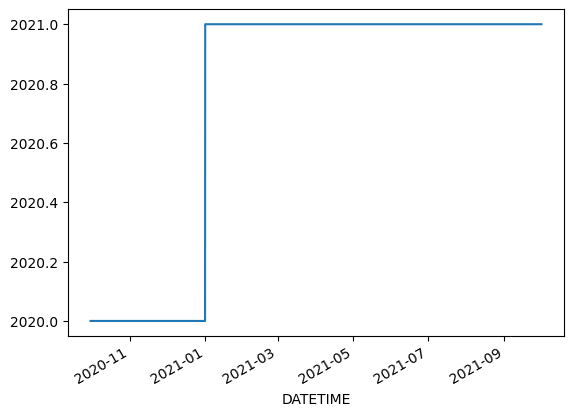

ValueError: list.remove(x): x not in list

In [10]:
# visualizing numeric data

for i in numeric_features:
    data[i].plot()
    plt.show()

    # remove useless numeric features for plotting perspective
feats= ['Unnamed: 0', 'HOURENDING', 'PEAKTYPE', 'YEAR' ]
for i in range (len(feats)):

  numeric_features.remove(feats[i])

for features in numeric_features:

  median=data[features].median()
  

  data[features].fillna(value=median, inplace=True)

    # checking for correaltion
new_df = pd.DataFrame(columns=numeric_features)
for features in numeric_features:
    new_df[features] = data[features]

In [ ]:
# h0 null hypothesis = data is no stationary
# h1 data is stationary
from statsmodels.tsa.stattools import adfuller
# adfuller gives 5 different values
'''ArithmeticError
1. ADF test statistic
2. P=Vaule
3. #lags used
4. Number of observations used'''
test_result = adfuller(data['HB_HOUSTON (DALMP)'])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/antpc/anaconda3/envs/stem/lib/python3.8/site-packages/scipy/__init__.py", line 203, in __getattr__
    return globals()[name]
KeyError: '_lib'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/antpc/anaconda3/envs/stem/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_68769/2282590777.py", line 1, in <module>
    from statsmodels.tsa.stattools import adfuller
  File "/home/antpc/anaconda3/envs/stem/lib/python3.8/site-packages/statsmodels/tsa/stattools.py", line 9, in <module>
    from statsmodels.compat.scipy import _next_regular
  File "/home/antpc/anaconda3/envs/stem/lib/python3.8/site-packages/statsmodels/compat/scipy.py", line 73, in <module>
    from scipy.stats import multivariate_t  # noqa: F401
  File "/home/antpc/anaconda3/envs/stem/lib/python3.8/sit

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(marginal_price):

    result = adfuller(marginal_price)
    labels = ["ADF Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"]

    for value, label in zip(result, labels):
        print(label+':'+str(value))
        if result[1]<=0.05:
            print("Strong evidence against the null hypothesis, reject it")
        else:
            print("weak evidence against null hypothesis, time series has a unit root")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/antpc/anaconda3/envs/stem/lib/python3.8/site-packages/scipy/__init__.py", line 203, in __getattr__
    return globals()[name]
KeyError: '_lib'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/antpc/anaconda3/envs/stem/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_68769/1271716496.py", line 1, in <module>
    from statsmodels.tsa.stattools import adfuller
  File "/home/antpc/anaconda3/envs/stem/lib/python3.8/site-packages/statsmodels/tsa/stattools.py", line 9, in <module>
    from statsmodels.compat.scipy import _next_regular
  File "/home/antpc/anaconda3/envs/stem/lib/python3.8/site-packages/statsmodels/compat/scipy.py", line 73, in <module>
    from scipy.stats import multivariate_t  # noqa: F401
  File "/home/antpc/anaconda3/envs/stem/lib/python3.8/sit

In [ ]:
adfuller_test(data["HB_HOUSTON (DALMP)"])

NameError: name 'adfuller' is not defined

In [ ]:
# if data is no stationary, we need to make it so

# we just shift 1 position of 
# data["HB_HOUSTON (DALMP)"].shift(1)

# if data is seasonal, instead of shifting by 1, we shift by 12

# and subtract it from the actualsales/forecaseted data

# and make a NEW feature called SEASONAL FIRST DIFFERENCE 

# thank do the adfuller again after removing nan

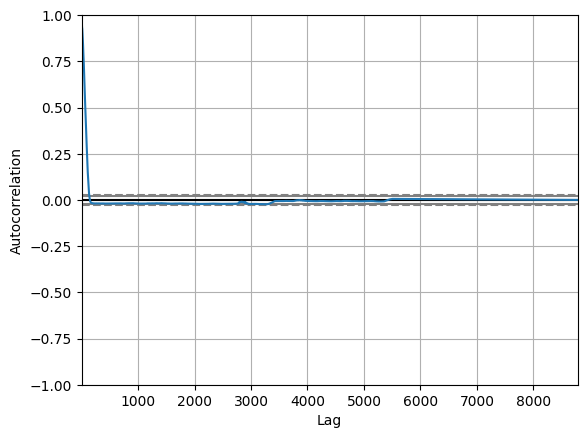

In [ ]:
# autoregressive model

# how many previous data needs to be considered is told by autto correlation graph
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data["HB_HOUSTON (DALMP)"])
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
dt = data.drop(columns=["Henry (GASPRICE)", "HOURENDING", "MARKETDAY", "MONTH", "YEAR"])

model=ARIMA(dt["HB_HOUSTON (DALMP)"],order=(0,0,0))
model_fit=model.fit()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/antpc/anaconda3/envs/stem/lib/python3.8/site-packages/scipy/__init__.py", line 203, in __getattr__
    return globals()[name]
KeyError: '_lib'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/antpc/anaconda3/envs/stem/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_68769/729140592.py", line 1, in <module>
    from statsmodels.tsa.arima.model import ARIMA
  File "/home/antpc/anaconda3/envs/stem/lib/python3.8/site-packages/statsmodels/tsa/arima/model.py", line 14, in <module>
    from statsmodels.tsa.statespace import sarimax
  File "/home/antpc/anaconda3/envs/stem/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py", line 19, in <module>
    from statsmodels.tsa.arima.specification import SARIMAXSpecification
  File "/home/antpc/anaconda3/envs

In [ ]:
model_fit.summary()

NameError: name 'model_fit' is not defined

In [ ]:
#p specifies about AR model lags, D is diferrencing and Q are moving average lags

# ACF exponential decrease
# PACF suddent drop to 0

# p=1 and q=1 , d=1(seasonal differencing)


In [ ]:
# future forecasting



datetime.datetime(2020, 10, 3, 23, 0)

In [ ]:
# looking at the above graphs, since almost all distributions are skewed, replacing the missing values by median.


for features in numeric_features:

  median=data[features].median()
  

  data[features].fillna(value=median, inplace=True)

In [ ]:
# checking for correaltion
new_df = pd.DataFrame(columns=numeric_features)
for features in numeric_features:
    new_df[features] = data[features]

In [ ]:
new_df.corr()

In [ ]:
'''
GR_West (WIND RTI) and GR_ERCOT() WIND RTI have a very high correlation >95%

WZ_COAST(RT_LOAD), WZ EAST(RT_LOAD), NORTH, North central, south Sotuh west have a high correlation with WZ_ERCOT (RTLOAD)>90%

WZCOAST load and WZ central load have a high correlation >90%

WZ_EAST too has a high correaltion with 93% with other loads

'''

In [ ]:
new_df = new_df.drop(columns = "WZ_ERCOT (RTLOAD)")

In [ ]:
new_df = new_df.drop(columns = "WZ_East (RTLOAD)")

In [ ]:
new_df = new_df.drop(columns = "WZ_NorthCentral (RTLOAD)")

In [ ]:
# h0 null hypothesis = data is no stationary
# h1 data is stationary
from statsmodels.tsa.stattools import adfuller
# adfuller gives 5 different values
'''ArithmeticError
1. ADF test statistic
2. P=Vaule
3. #lags used
4. Number of observations used'''
test_result = adfuller(new_df['HB_HOUSTON (DALMP)'])

In [ ]:
def adfuller_test(marginal_price):

    result = adfuller(marginal_price)
    labels = ["ADF Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"]

    for value, label in zip(result, labels):
        print(label+':'+str(value))
        if result[1]<=0.05:
            print("Strong evidence against the null hypothesis, reject it")
        else:
            print("weak evidence against null hypothesis, time series has a unit root")

In [ ]:
adfuller_test(new_df["HB_HOUSTON (DALMP)"])

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
new_df.head()

Y = new_df["HB_HOUSTON (DALMP)"]


In [ ]:
X = new_df.drop(columns="HB_HOUSTON (DALMP)")

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
fig = plot_acf(Y, lags=50)
fig = plot_pacf(Y, lags=40)

In [ ]:
X= X.drop(columns="HOURENDING")
X= X.drop(columns="WZ_ERCOT (RTLOAD)")
X = X.drop(columns = "WZ_East (RTLOAD)")
X = X.drop(columns = "WZ_NorthCentral (RTLOAD)")
X = X.drop(columns = "TX - Houston/Intercontinental (TEMP_F)")	# removed becuase of high std.error
X = X.drop(columns = "ERCOT (GEN_RESOURCE)") #very low coeff, removing this brought prices to +ve territory
X = X.drop(columns = "ERCOT (GEN_RESOURCE)") #very low coeff, removing this brought prices to +ve territory
X = X.drop(columns = "GR_PANHANDLE (WIND_RTI)") #very low coeff

In [ ]:
# from above graph it is clear that p/pacf=2 i i.e. the partial auto correlation comes down after 2 time lags, 
# and by problem statement we need to 
# use lags of 11 to predict 24 O/P values hence q = 11
# d=0 as no seasonal diffrence made 

model=ARIMA(Y,X,order=(2,1,11))
#model=ARIMA(Y,X,order=(11,0,2))
model_fit=model.fit()

In [ ]:
model_fit.summary()

In [ ]:
#import datetime as DT
#d1=DT.datetime(2020,10,3)
#d2=DT.datetime(2020,10,4)
#start_date = DT.datetime.strptime('2020-10-03T00:00:00','%Y-%m-%dT%H:%M:%S')
#end_date = DT.datetime.strptime('2020-10-04T00:00:00','%Y-%m-%dT%H:%M:%S')
d1= '2020-10-9 00:00:00'
d2= '2020-10-9 23:00:00'
df1= pd.to_datetime(d1)
df2= pd.to_datetime(d2)
#X['forecast']=
print(model_fit.predict(start=df1, end=df2,dynamic=True))
M = model_fit.predict(start=df1, end=df2,dynamic=True)
#X['forecast']=model_fit.predict(Y,dynamic=True)
#X["Day ahead price"] = data["HB_HOUSTON (DALMP)"]
#print(X["forecast"])
#X[['Day ahead price','forecast']].plot(figsize=(12,8))

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(M.values, Y.loc[d1:d2].values)
print(mse)
pred=M.values
actual=Y.loc[d1:d2].values
plt.plot(pred,"r")
plt.plot(actual,'g')